In [ ]:
#mengimport library
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
color_pal=sns.color_palette()
sns.set()

In [ ]:
df1=pd.read_excel('inflasi.xlsx')

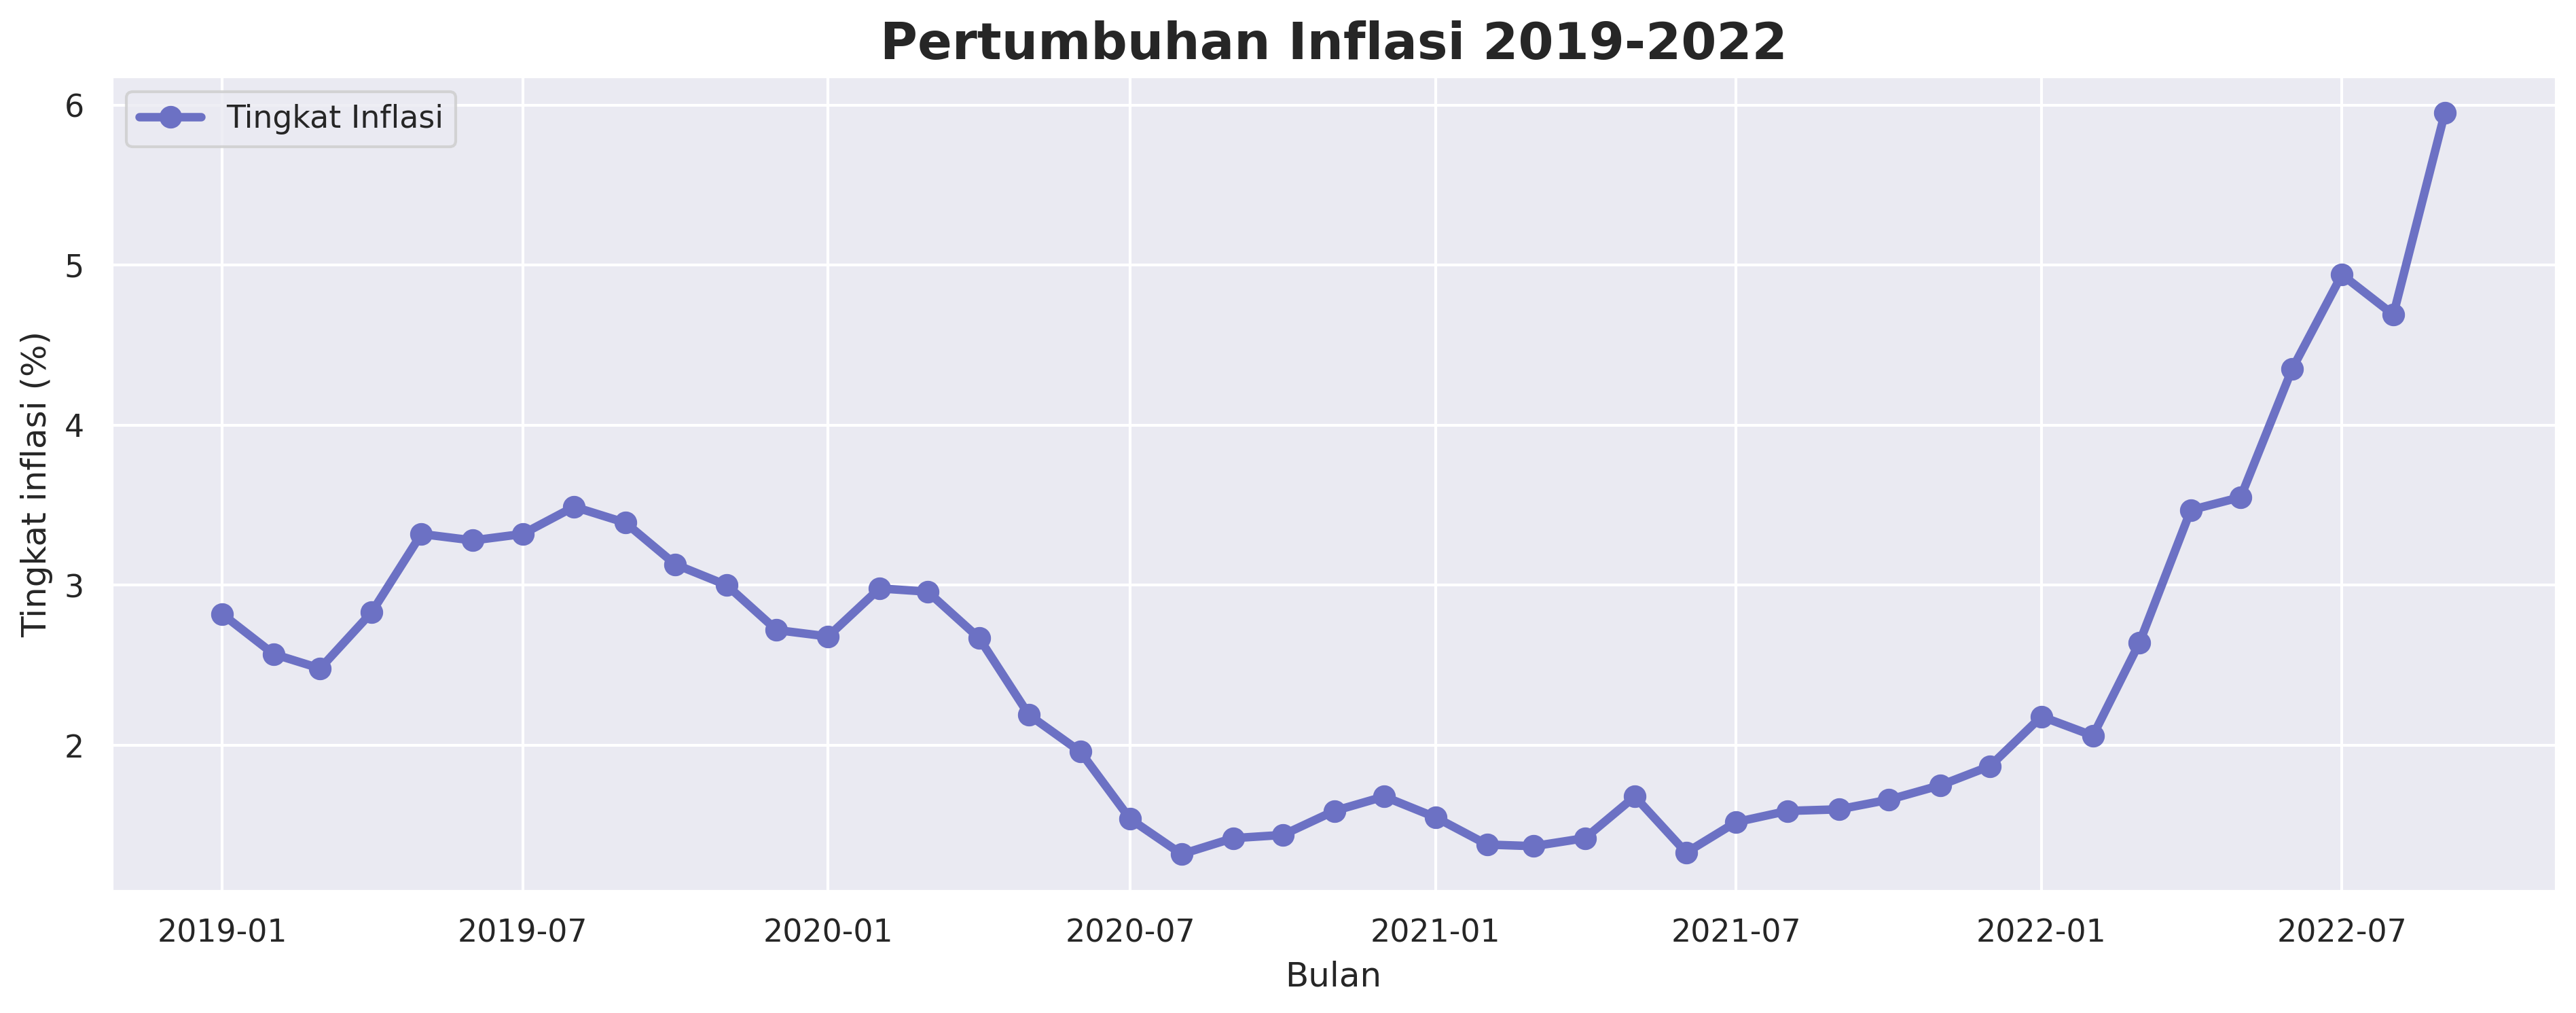

<Figure size 432x288 with 0 Axes>

In [ ]:
fig=plt.figure(dpi=300)
ax=fig.add_axes([0,0,2,1])
ax.plot(df1['Periode'],df1['Inflasi'], label='Tingkat Inflasi', color=color_pal[7], marker='.', lw=3, mew=5)
ax.legend()
ax.set_title("Pertumbuhan Inflasi 2019-2022",fontweight="bold", fontsize=18)
ax.set_xlabel("Bulan")
ax.set_ylabel('Tingkat inflasi (%)')
plt.show()
plt.savefig('inflasi.png')

In [ ]:
df=pd.read_excel('terpukul.xlsx')

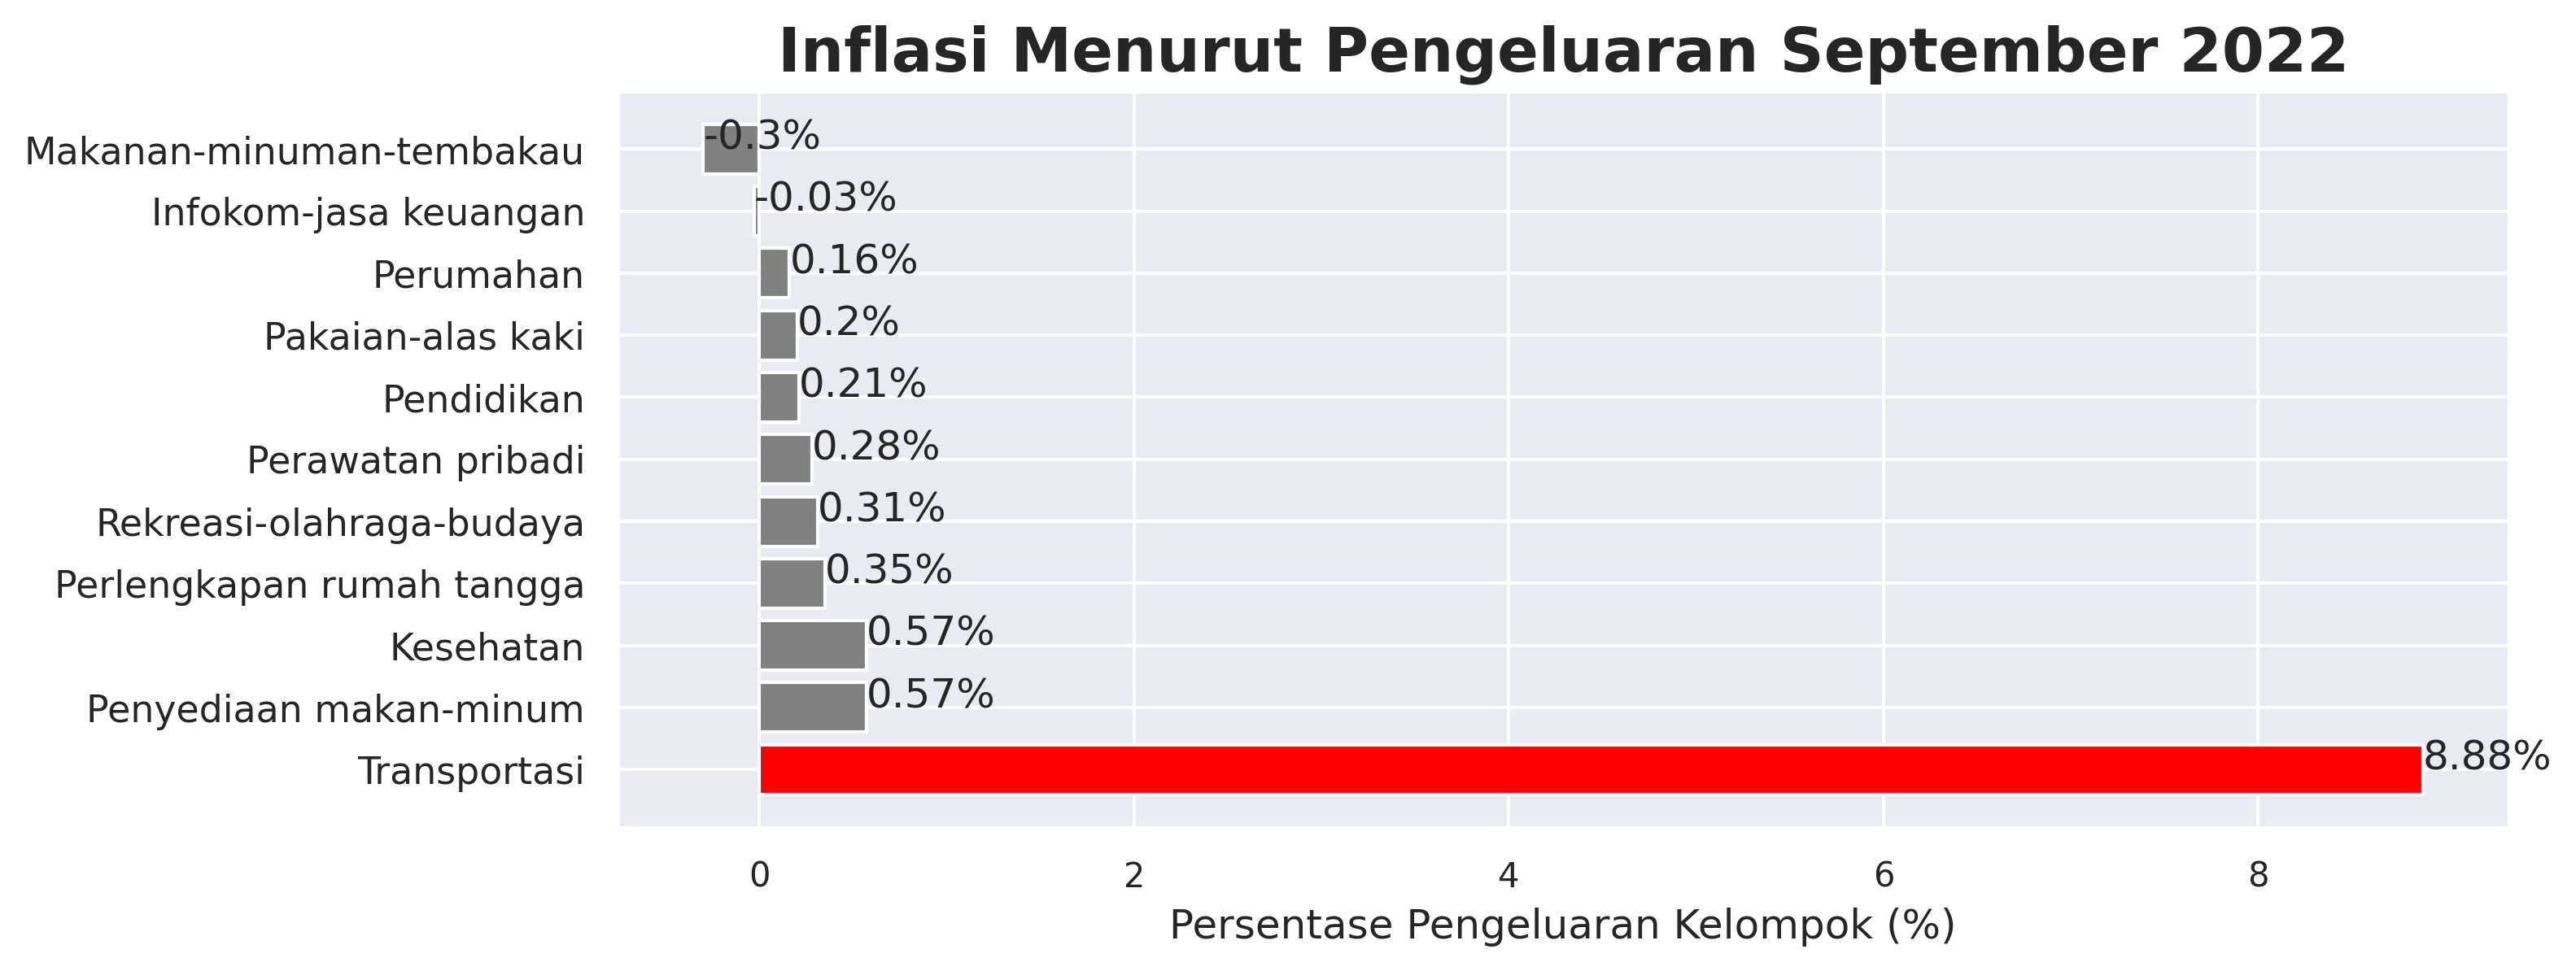

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)

name = list(df['nama_data'])
counts = list(df['value'])
clrs = ['grey' if (x < max(df1['Inflasi'])) else 'red' for x in df1['Inflasi'] ]
ax.barh(name, counts, color=clrs)
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value)+'%')

ax.set_xlabel('Persentase Pengeluaran Kelompok (%)')
plt.xticks(fontsize=10)
ax.set_title('Inflasi Menurut Pengeluaran September 2022', fontsize=18,fontweight='bold')

plt.show()
plt.savefig('kelompok_inflasi.png')


In [ ]:
df2=pd.read_excel('surveiipi.xlsx')

In [ ]:
df2

,nama_data,value
0,Sangat setuju,17.7
1,Setuju,35.6
2,Kurang setuju,28.7
3,Tak setuju sama sekali,12.8
4,TT/TJ,5.2


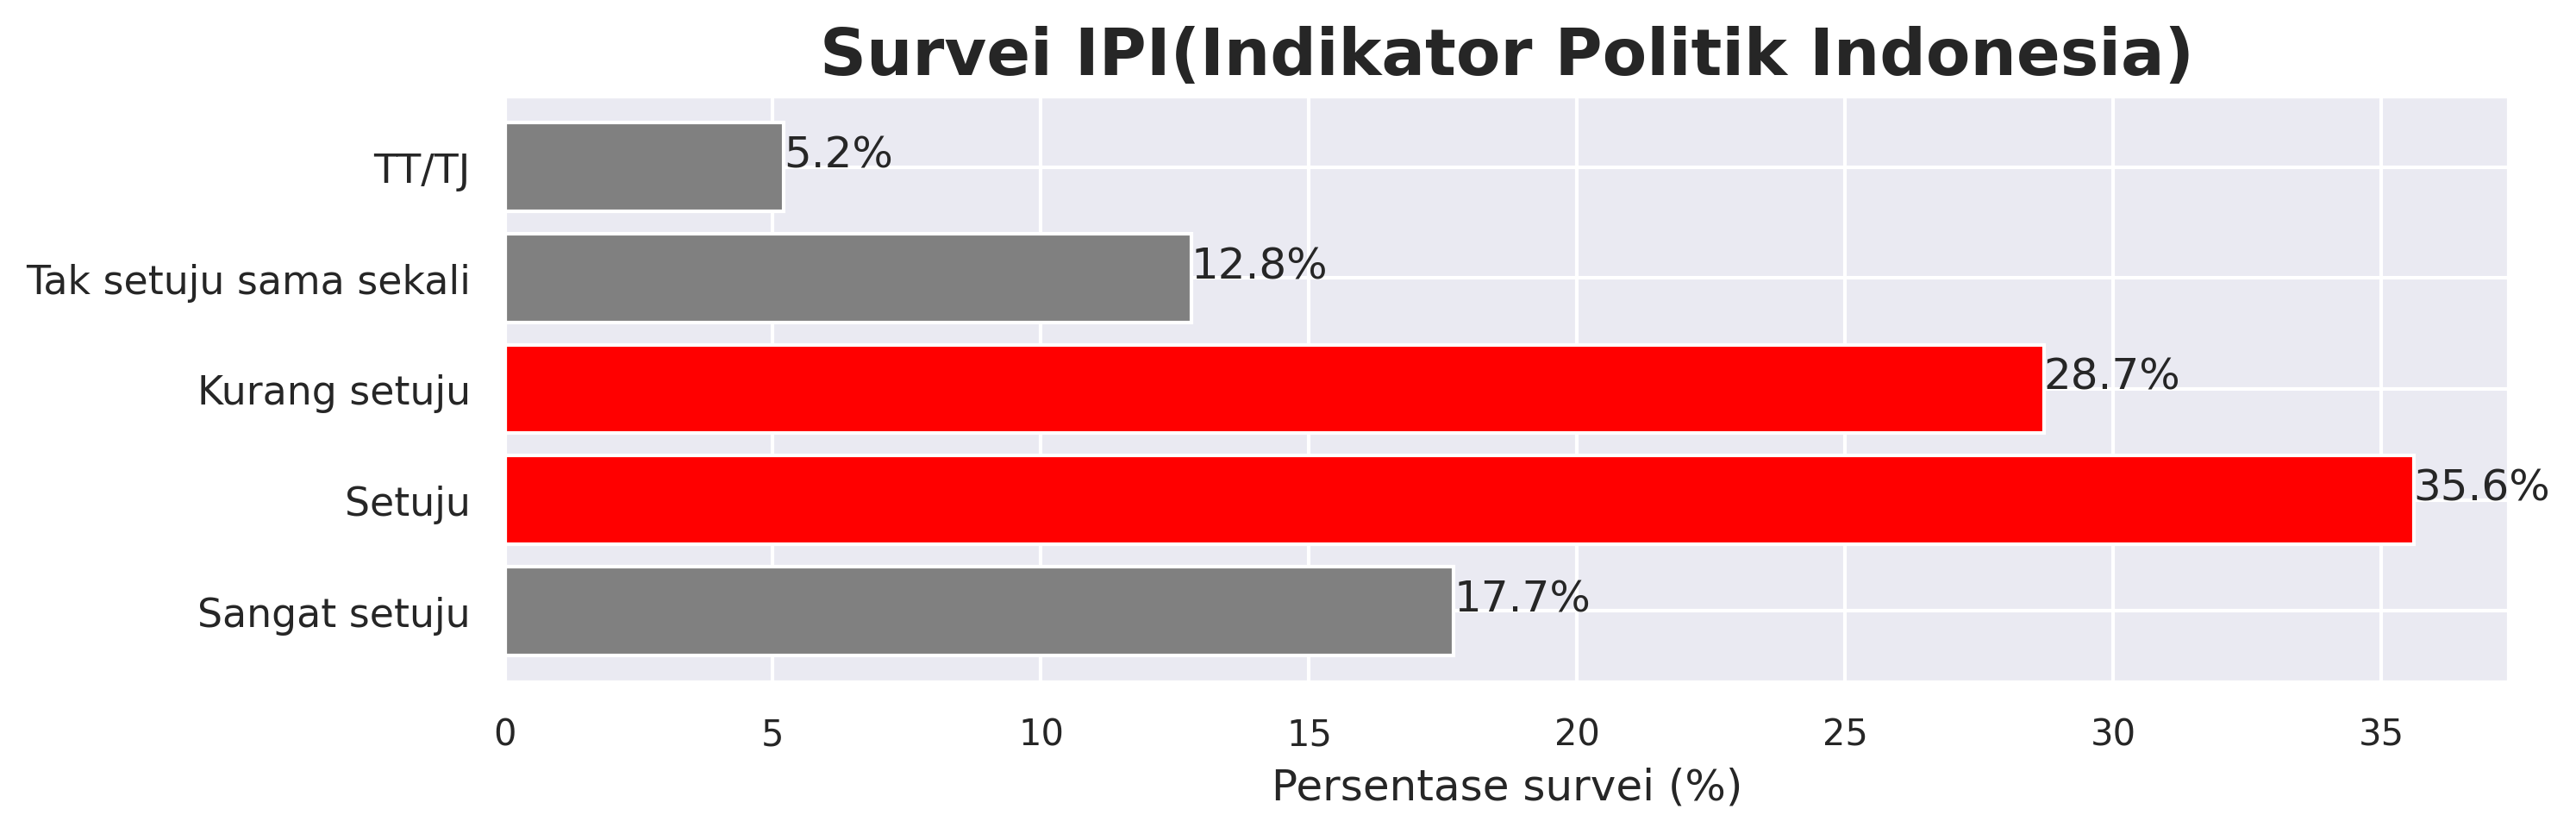

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)

name = list(df2['nama_data'])
counts = list(df2['value'])
clrs = ['grey' if (x < 25) else 'red' for x in df2['value'] ]
ax.barh(name, counts, color=clrs)
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value)+'%')

ax.set_xlabel('Persentase survei (%)')
plt.xticks(fontsize=10)
ax.set_title('Survei IPI(Indikator Politik Indonesia)', fontsize=18,fontweight='bold')

plt.show()
plt.savefig('survei.png')

In [ ]:
df3=pd.read_excel('mypertamina.xlsx')

-proses analisis clustering dengan heirarical clustering


In [ ]:
df_cluster=pd.read_excel('final_fix.xlsx')

In [ ]:
X=df_cluster.iloc[:, [1,2,3,4]].values

In [ ]:

# Standarisasi dengan standard scelar
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
s=[]
s=[0]
for i in range(2,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  y_kmeans = kmeans.fit_predict(X)
  score = silhouette_score(X, kmeans.labels_, metric='euclidean')
  s.append(score)

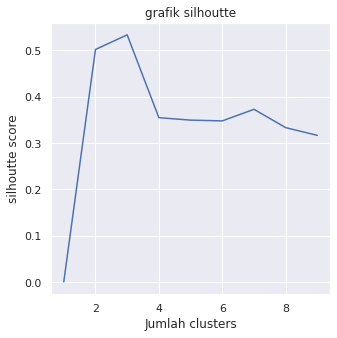

In [ ]:
fig, ax =plt.subplots(figsize=(5,5))
plt.plot(range(1,10),s)
plt.title('grafik silhoutte')
plt.xlabel('Jumlah clusters')
plt.ylabel('silhoutte score')
plt.show()



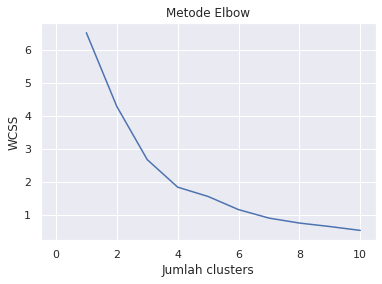

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.plot(np.arange(0,2000,10000),4)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

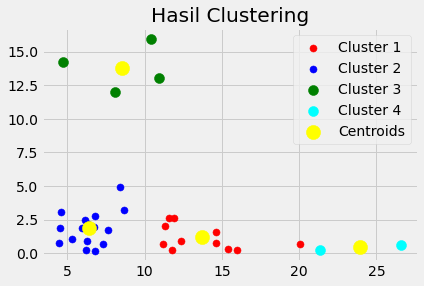

In [ ]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Hasil Clustering')
plt.legend()
plt.show()

In [ ]:
df_cluster['cluster']=y_kmeans

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 3, 3], dtype=int32)

In [ ]:
df.to_excel('jadi.xlsx',index=False)